<b>Breast Cancer Wisconsin (Diagnostic) Data Set</b> 
(reference to UCI Machine Learning Repository <a href="http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29">description</a>)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8

from IPython.display import display

import numpy as np
np.set_printoptions(precision=4, threshold=10000, linewidth=100, edgeitems=999, suppress=True)

import pandas as pd
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 200)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('precision', 6)

import warnings
warnings.simplefilter("ignore")

import seaborn as sns
sns.set()

from lib.outlierdetection import *

%load_ext watermark
%watermark -a "tb" -d -v -m -p sys,numpy,pandas,sklearn,torch,IPython

tb 2018-09-13 

CPython 3.6.4
IPython 6.2.1

sys 3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 12:04:33) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy 1.14.2
pandas 0.22.0
sklearn 0.19.2
torch 0.4.0a0+9692519
IPython 6.2.1

compiler   : GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 17.5.0
machine    : x86_64
processor  : i386
CPU cores  : 24
interpreter: 64bit


In [2]:
# Seed random generators for repro 
SEED = 2017
np.random.seed(SEED)  

In [3]:
# Load the dataset using sklearn and create a panda dataframe for analysis
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
feature_names = dataset.feature_names
target_names = dataset.target_names
data = pd.DataFrame(np.c_[dataset['target'], dataset['data']], columns= np.append(['diagnosis'], feature_names ))

feature_names, target_names

(array(['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness',
        'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry',
        'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error', 'concave points error',
        'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity',
        'worst concave points', 'worst symmetry', 'worst fractal dimension'], dtype='<U23'),
 array(['malignant', 'benign'], dtype='<U9'))

In [4]:
# Check for NaNs and if scaling is required - look for categorial data that need transformation
display(data.head())
display(data.describe())

diagnosis  mean radius  mean texture  mean perimeter  mean area  mean smoothness  mean compactness  mean concavity  mean concave points  mean symmetry  mean fractal dimension  radius error  texture error  perimeter error  area error  smoothness error  compactness error  concavity error  concave points error  symmetry error  fractal dimension error  worst radius  worst texture  worst perimeter  worst area  worst smoothness  worst compactness  worst concavity  worst concave points  worst symmetry  worst fractal dimension
0        0.0        17.99         10.38          122.80     1001.0          0.11840           0.27760          0.3001              0.14710         0.2419                 0.07871        1.0950         0.9053            8.589      153.40          0.006399            0.04904          0.05373               0.01587         0.03003                 0.006193         25.38          17.33           184.60      2019.0            0.1622             0.6656           0.7119                0.2654          0.4601                  0.11890
1        0.0        20.57         17.77          132.90     1326.0          0.08474           0.07864          0.0869              0.07017         0.1812                 0.05667        0.5435         0.7339            3.398       74.08          0.005225            0.01308          0.01860               0.01340         0.01389                 0.003532         24.99          23.41           158.80      1956.0            0.1238             0.1866           0.2416                0.1860          0.2750                  0.08902
2        0.0        19.69         21.25          130.00     1203.0          0.10960           0.15990          0.1974              0.12790         0.2069                 0.05999        0.7456         0.7869            4.585       94.03          0.006150            0.04006          0.03832               0.02058         0.02250                 0.004571         23.57          25.53           152.50      1709.0            0.1444             0.4245           0.4504                0.2430          0.3613                  0.08758
3        0.0        11.42         20.38           77.58      386.1          0.14250           0.28390          0.2414              0.10520         0.2597                 0.09744        0.4956         1.1560            3.445       27.23          0.009110            0.07458          0.05661               0.01867         0.05963                 0.009208         14.91          26.50            98.87       567.7            0.2098             0.8663           0.6869                0.2575          0.6638                  0.17300
4        0.0        20.29         14.34          135.10     1297.0          0.10030           0.13280          0.1980              0.10430         0.1809                 0.05883        0.7572         0.7813            5.438       94.44          0.011490            0.02461          0.05688               0.01885         0.01756                 0.005115         22.54          16.67           152.20      1575.0            0.1374             0.2050           0.4000                0.1625          0.2364                  0.07678

diagnosis  mean radius  mean texture  mean perimeter    mean area  mean smoothness  mean compactness  mean concavity  mean concave points  mean symmetry  mean fractal dimension  radius error  texture error  perimeter error  area error  smoothness error  compactness error  concavity error  concave points error  symmetry error  fractal dimension error  worst radius  worst texture  worst perimeter   worst area  worst smoothness  worst compactness  worst concavity  worst concave points  worst symmetry  worst fractal dimension
count  569.000000   569.000000    569.000000      569.000000   569.000000       569.000000        569.000000      569.000000           569.000000     569.000000              569.000000    569.000000     569.000000       569.000000  569.000000        569.000000         569.000000       569.000000            569.000000      569.000000               569.000000    569.000000     569.000000       569.000000   569.000000        569.000000         569.000000       569.000000            569.000000      569.000000               569.000000
mean     0.627417    14.127292     19.289649       91.969033   654.889104         0.096360          0.104341        0.088799             0.048919       0.181162                0.062798      0.405172       1.216853         2.866059   40.337079          0.007041           0.025478         0.031894              0.011796        0.020542                 0.003795     16.269190      25.677223       107.261213   880.583128          0.132369           0.254265         0.272188              0.114606        0.290076                 0.083946
std      0.483918     3.524049      4.301036       24.298981   351.914129         0.014064          0.052813        0.079720             0.038803       0.027414                0.007060      0.277313       0.551648         2.021855   45.491006          0.003003           0.017908         0.030186              0.006170        0.008266                 0.002646      4.833242       6.146258        33.602542   569.356993          0.022832           0.157336         0.208624              0.065732        0.061867                 0.018061
min      0.000000     6.981000      9.710000       43.790000   143.500000         0.052630          0.019380        0.000000             0.000000       0.106000                0.049960      0.111500       0.360200         0.757000    6.802000          0.001713           0.002252         0.000000              0.000000        0.007882                 0.000895      7.930000      12.020000        50.410000   185.200000          0.071170           0.027290         0.000000              0.000000        0.156500                 0.055040
25%      0.000000    11.700000     16.170000       75.170000   420.300000         0.086370          0.064920        0.029560             0.020310       0.161900                0.057700      0.232400       0.833900         1.606000   17.850000          0.005169           0.013080         0.015090              0.007638        0.015160                 0.002248     13.010000      21.080000        84.110000   515.300000          0.116600           0.147200         0.114500              0.064930        0.250400                 0.071460
50%      1.000000    13.370000     18.840000       86.240000   551.100000         0.095870          0.092630        0.061540             0.033500       0.179200                0.061540      0.324200       1.108000         2.287000   24.530000          0.006380           0.020450         0.025890              0.010930        0.018730                 0.003187     14.970000      25.410000        97.660000   686.500000          0.131300           0.211900         0.226700              0.099930        0.282200                 0.080040
75%      1.000000    15.780000     21.800000      104.100000   782.700000         0.105300          0.130400        0.130700             0.074000       0.195700                0.066120      0.478900       1.474000         3.357000   45.190000          0.00

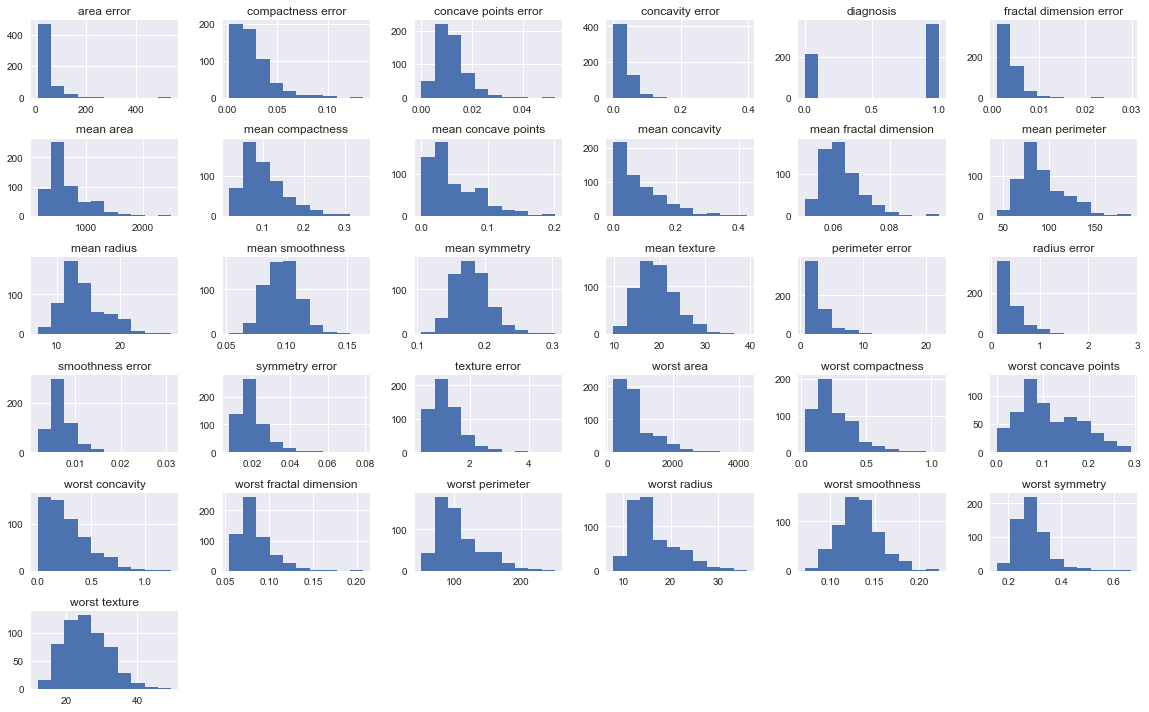

In [5]:
# check features and their individual distribution - watch for outliers
data.hist(figsize=(16,10));
plt.tight_layout()

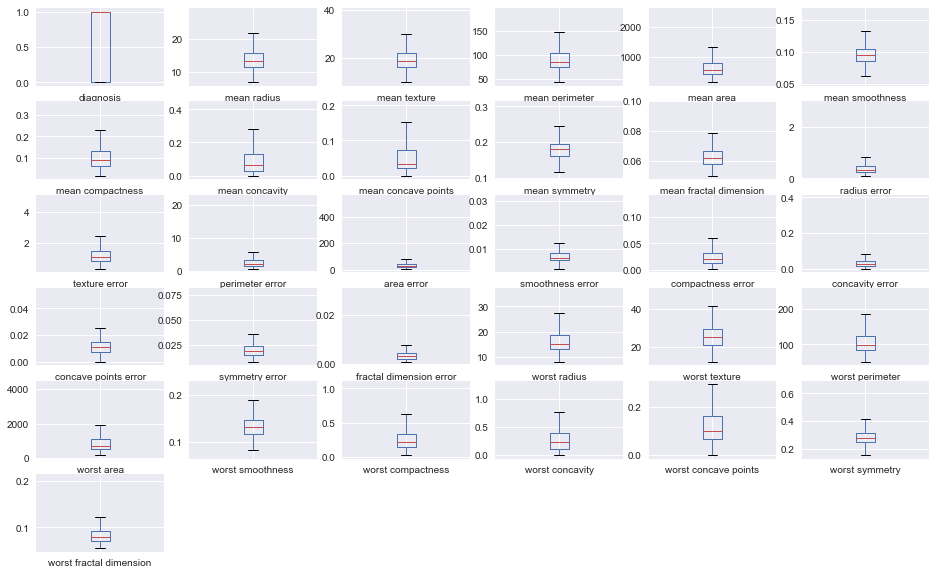

In [6]:
data.plot(kind= 'box' , subplots=True, layout=(6,6), sharex=False, sharey=False, figsize=(16,10));

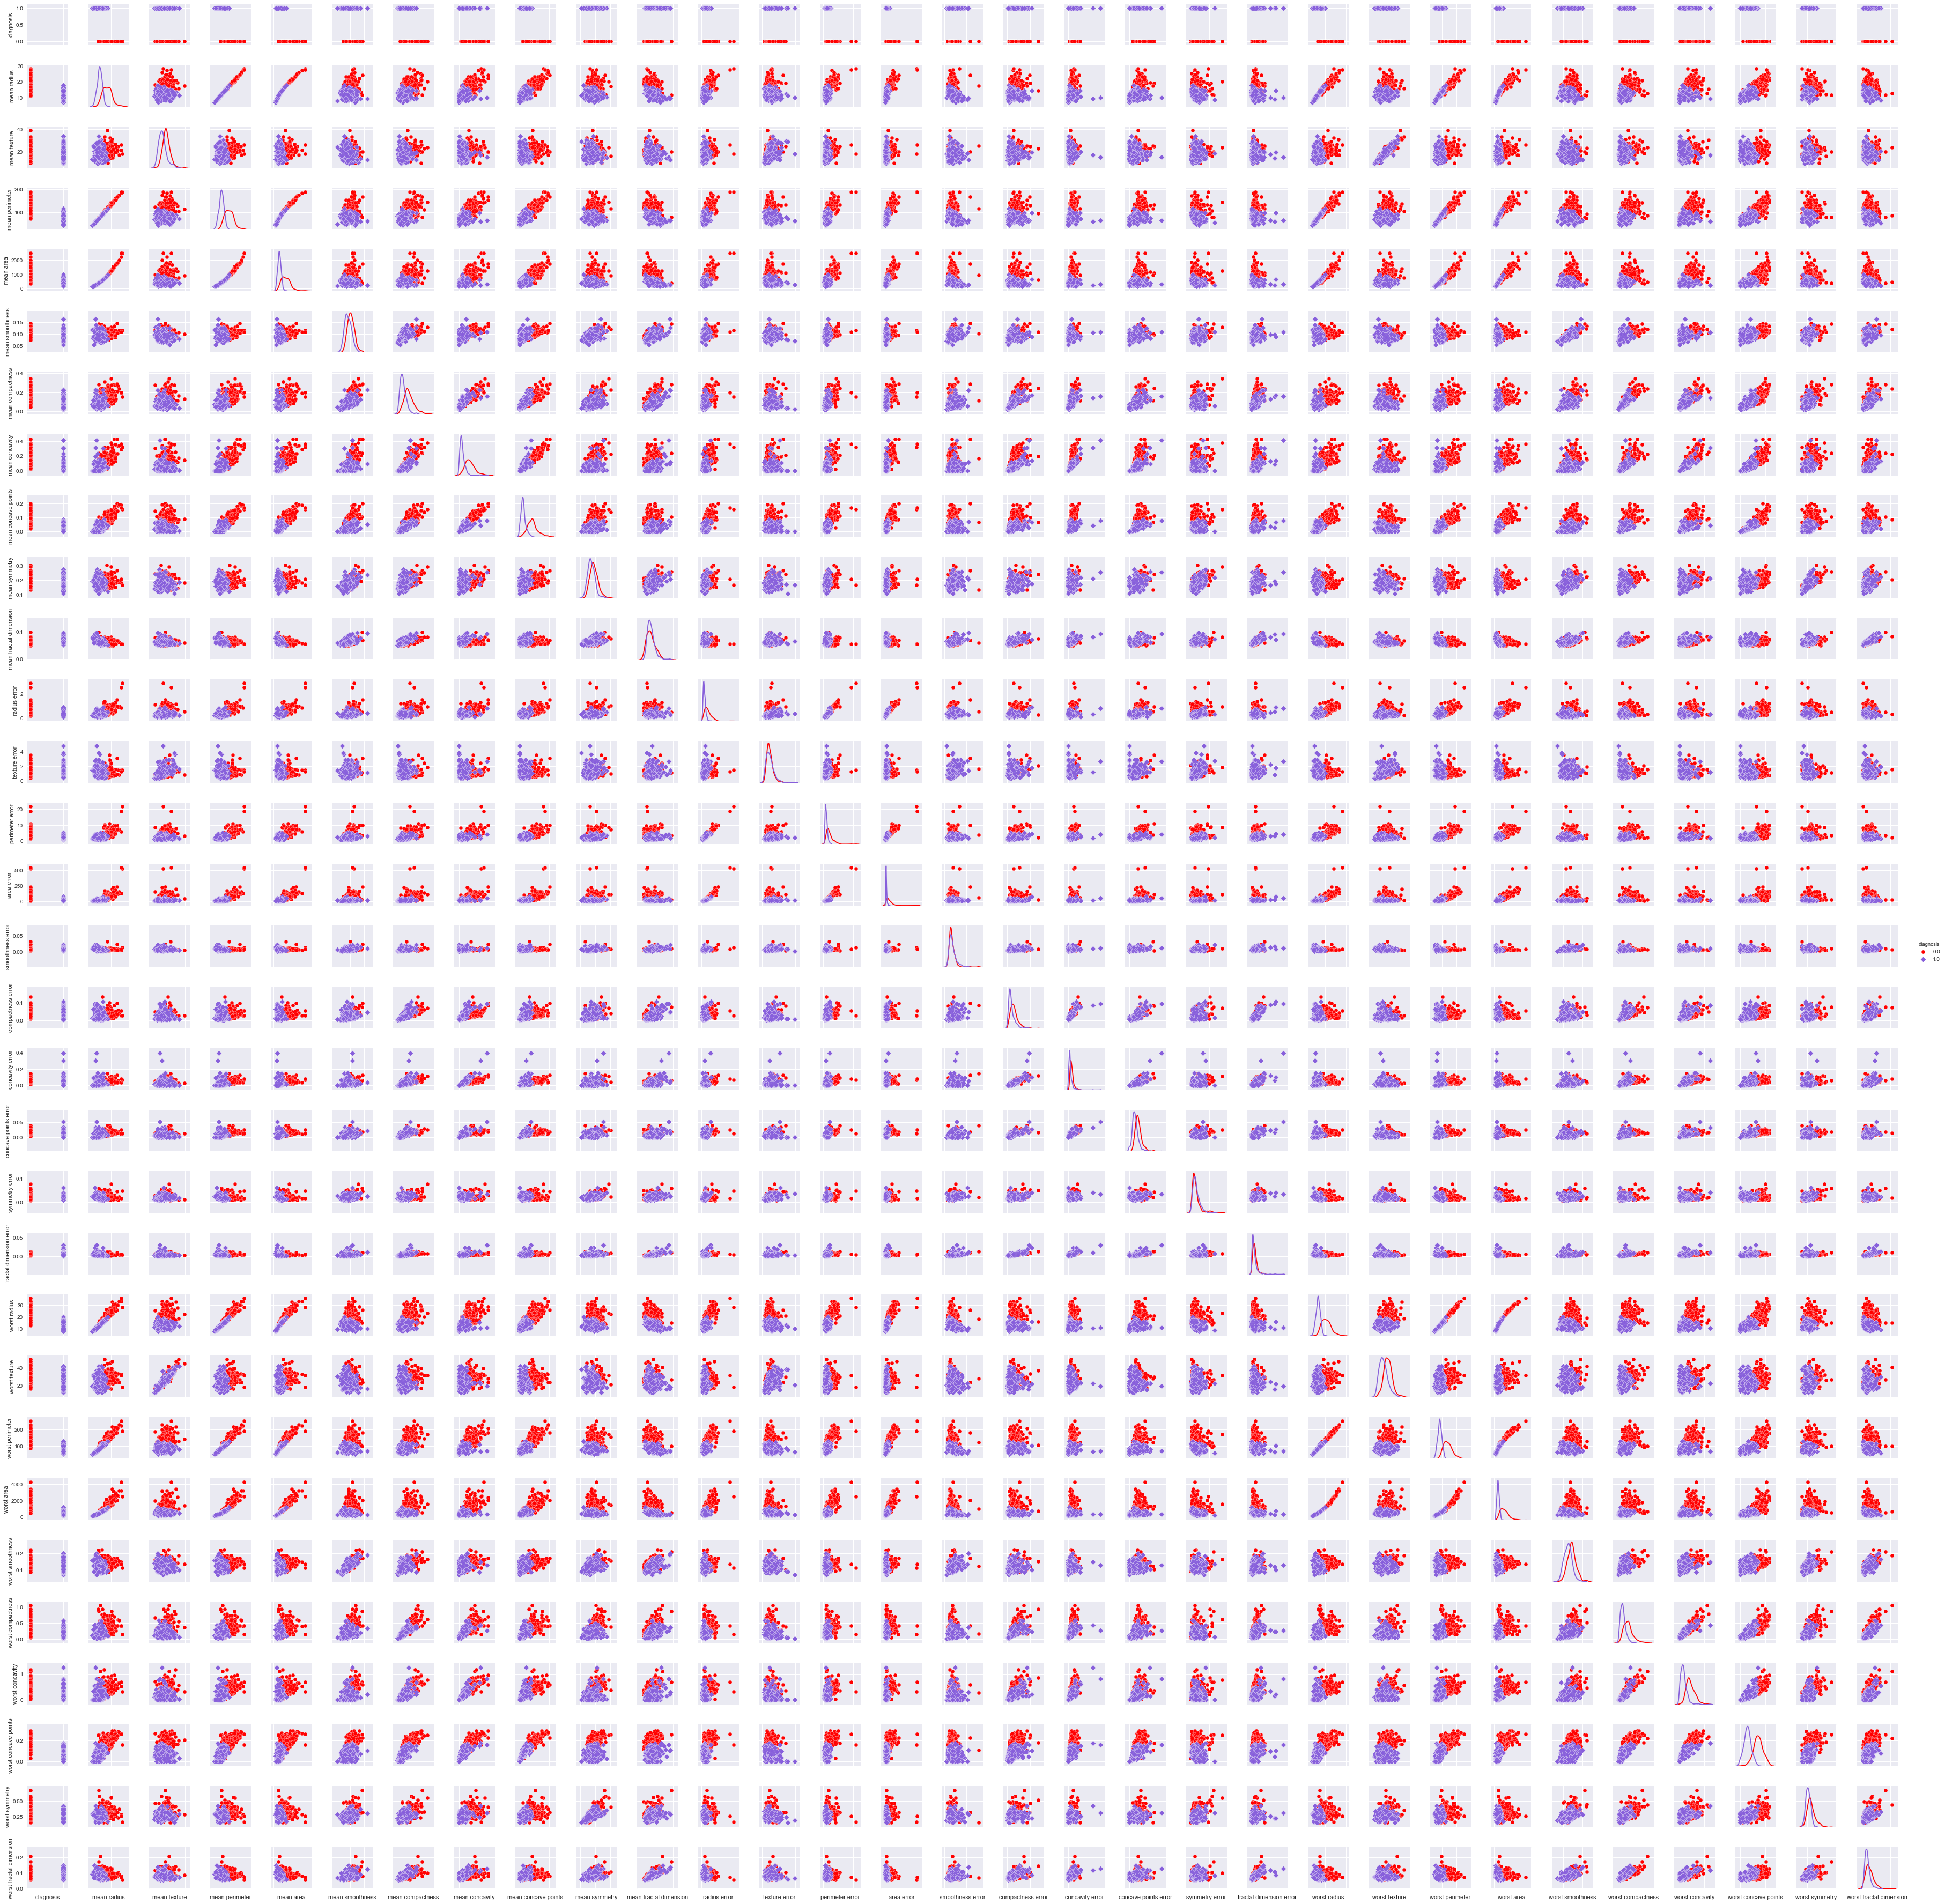

In [7]:
# Produce a scatter matrix for each pair of features in the data - plot provides insight 
# into the data distributon for the individual features

# Note the result below is an image - you can zoom in to see details
mx_plot = sns.pairplot(data, diag_kind="kde", hue = 'diagnosis', palette = ('Red', '#875FDB'), 
             markers=["o", "D"], size=1.6)
_ = mx_plot.set(xticklabels=[])

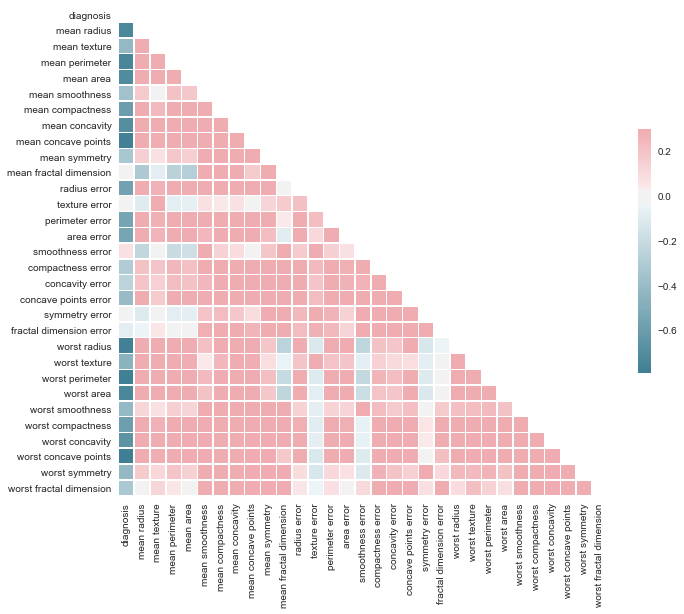

In [8]:
# Correlation analysis - watch for uncorrelated features that don't contribute
# http://seaborn.pydata.org/examples/many_pairwise_correlations.html
import seaborn as sns

sns.set(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

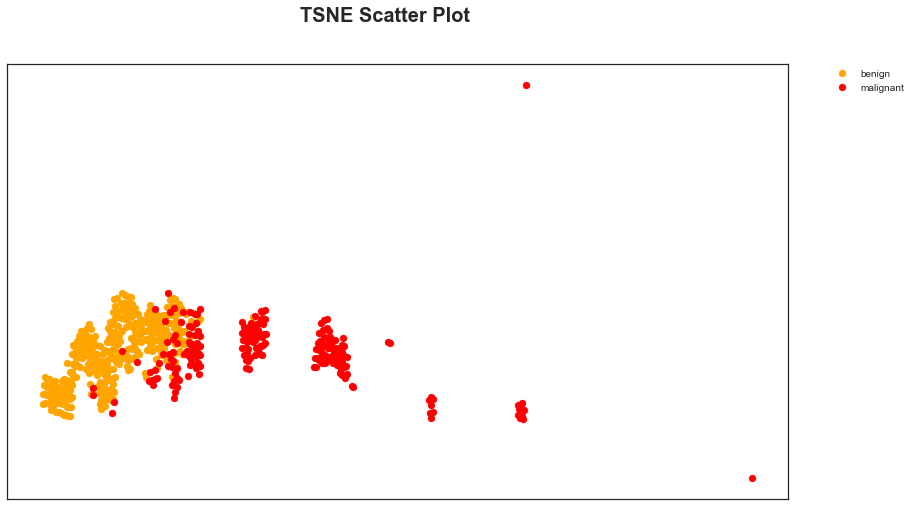

In [9]:
# TSNE - Visualization of the structure of the dataset to see how hard it is to seeperate 
# the two classes
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='pca', random_state=0)
tsne_data_raw = tsne.fit_transform(np.float32(data.values[:,1:]))
labels_raw = np.int32(data.values[:,0])

fig, ax = plt.subplots(figsize=(14, 8))

ax.scatter(tsne_data_raw[np.where(labels_raw==1),0],tsne_data_raw[np.where(labels_raw==1),1], c='orange', label=target_names[1])
ax.scatter(tsne_data_raw[np.where(labels_raw==0),0],tsne_data_raw[np.where(labels_raw==0),1], c='red', label=target_names[0])

ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])

fig.suptitle('TSNE Scatter Plot', fontsize=20, fontweight='bold')
plt.legend(loc=2, borderaxespad=.1, scatterpoints=1,bbox_to_anchor=(1.05, 1))

diagnosis
0.0    212
1.0    357
dtype: int64 ['malignant' 'benign']


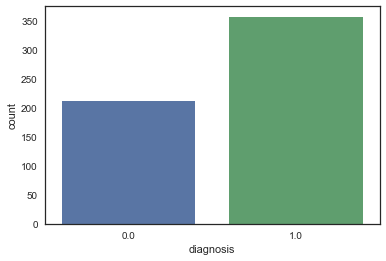

In [10]:
# check class distribution and if classes are balanced - Benign and Maglinant -  
# majority is Benign - this is a problem
print(data.groupby('diagnosis').size(), target_names)
sns.countplot(data["diagnosis"])

In [11]:
# Check for null values 
for column in feature_names:
    print("%s %d" % (str(column).ljust(25), np.sum((data[column] == 0.0))))

mean radius               0
mean texture              0
mean perimeter            0
mean area                 0
mean smoothness           0
mean compactness          0
mean concavity            13
mean concave points       13
mean symmetry             0
mean fractal dimension    0
radius error              0
texture error             0
perimeter error           0
area error                0
smoothness error          0
compactness error         0
concavity error           13
concave points error      13
symmetry error            0
fractal dimension error   0
worst radius              0
worst texture             0
worst perimeter           0
worst area                0
worst smoothness          0
worst compactness         0
worst concavity           13
worst concave points      13
worst symmetry            0
worst fractal dimension   0


In [12]:
# http://activisiongamescience.github.io/2015/12/23/Unsupervised-Anomaly-Detection-SOD-vs-One-class-SVM/
# Outlier detection - adjust threshold to select appropriate set
# set to -1 to pass-through

# remove the target class column from frame 
column_features = data.keys()[1:]

data_out = outlier_detection(data, column_features, threshold=8.5)

# Look at the outliers
display(
    data[~data.index.isin(data_out.index)].describe()
)

diagnosis  mean radius  mean texture  mean perimeter    mean area  mean smoothness  mean compactness  mean concavity  mean concave points  mean symmetry  mean fractal dimension  radius error  texture error  perimeter error  area error  smoothness error  compactness error  concavity error  concave points error  symmetry error  fractal dimension error  worst radius  worst texture  worst perimeter   worst area  worst smoothness  worst compactness  worst concavity  worst concave points  worst symmetry  worst fractal dimension
count   3.000000     3.000000      3.000000        3.000000     3.000000         3.000000          3.000000        3.000000             3.000000       3.000000                3.000000      3.000000       3.000000         3.000000    3.000000          3.000000           3.000000         3.000000              3.000000        3.000000                 3.000000      3.000000       3.000000         3.000000     3.000000          3.000000            3.00000         3.000000              3.000000        3.000000                 3.000000
mean    0.333333    14.986667     27.316667       98.773333   768.033333         0.084993          0.140973        0.147970             0.068340       0.185800                0.061827      0.522700       1.366000         3.915000   51.306667          0.006538           0.034517         0.039490              0.010737        0.021060                 0.004287     18.058667      34.636667       123.486667  1071.200000          0.122953            0.41398         0.426333              0.135600        0.305867                 0.090863
std     0.577350     6.570277      2.484559       46.822603   547.583787         0.032587          0.121401        0.182147             0.077149       0.046679                0.007313      0.179577       0.265486         1.666919   33.619870          0.000643           0.028563         0.036222              0.009314        0.007048                 0.001735      8.181003       4.547069        62.781705   777.545703          0.038330            0.41191         0.475227              0.132609        0.094853                 0.028962
min     0.000000     7.760000     24.540000       47.920000   181.000000         0.052630          0.043620        0.000000             0.000000       0.158700                0.056480      0.385700       1.075000         2.548000   19.150000          0.005903           0.004660         0.000000              0.000000        0.013180                 0.002783      9.456000      30.370000        59.160000   268.600000          0.089960            0.06444         0.000000              0.000000        0.221800                 0.070390
25%     0.000000    12.180000     26.310000       78.110000   519.550000         0.068590          0.072960        0.046255             0.026510       0.158850                0.057660      0.421050       1.251500         2.986500   33.850000          0.006213           0.020985         0.023650              0.007785        0.018210                 0.003338     14.218000      32.245000        92.930000   696.300000          0.101930            0.18692         0.170150              0.070900        0.254450                 0.074295
50%     0.000000    16.600000     28.080000      108.300000   858.100000         0.084550          0.102300        0.092510             0.053020       0.159000                0.058840      0.456400       1.428000         3.425000   48.550000          0.006522           0.037310         0.047300              0.015570        0.023240                 0.003892     18.980000      34.120000       126.700000  1124.000000          0.113900            0.30940         0.340300              0.141800        0.287100                 0.078200
75%     0.500000    18.600000     28.705000      124.200000  1061.550000         0.101175          0.189650        0.221955             0.102510       0.199350                0.064500      0.591200       1.511500         4.598500   67.385000          0.006856   

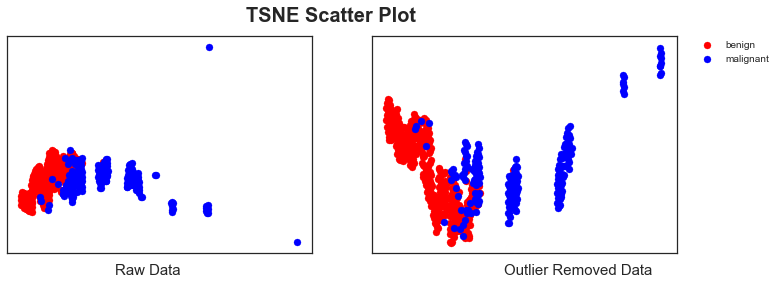

In [13]:
#TSNE
from sklearn.manifold import TSNE

tsne =TSNE(n_components=2, init='pca', random_state=0)
tsne_data_raw = tsne.fit_transform(np.float32(data.drop('diagnosis', axis=1).values))
tsne_labels_raw = np.int64(data['diagnosis'].values)

tsne_data_scale = tsne.fit_transform(tsne.fit_transform(np.float32(data_out.drop('diagnosis', axis=1).values)))
tsne_labels_scaled = np.int64(data_out['diagnosis'].values)

tsne_label_names = target_names

#set up figure
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(12)
fig.set_figheight(4)

#Plot
ax1.scatter(tsne_data_raw[np.where(tsne_labels_raw==1),0],tsne_data_raw[np.where(tsne_labels_raw==1),1], 
            c='r', label=tsne_label_names[1])
ax1.scatter(tsne_data_raw[np.where(tsne_labels_raw==0),0],tsne_data_raw[np.where(tsne_labels_raw==0),1], 
            c='b', label=tsne_label_names[0])

ax2.scatter(tsne_data_scale[np.where(tsne_labels_scaled==1),0],tsne_data_scale[np.where(tsne_labels_scaled==1),1], 
            c='r', label=tsne_label_names[1])
ax2.scatter(tsne_data_scale[np.where(tsne_labels_scaled==0),0],tsne_data_scale[np.where(tsne_labels_scaled==0),1], 
            c='b', label=tsne_label_names[0])

ax1.axes.get_xaxis().set_ticks([])
ax1.axes.get_yaxis().set_ticks([])
ax2.axes.get_xaxis().set_ticks([])
ax2.axes.get_yaxis().set_ticks([])

fig.suptitle('TSNE Scatter Plot', fontsize=20, fontweight='bold')
plt.legend(loc=2, borderaxespad=.1, scatterpoints=1,bbox_to_anchor=(1.05, 1))

fig.text(.25,.05,'Raw Data', fontsize=15)
fig.text(.70,.05,'Outlier Removed Data', fontsize=15)

plt.show()